In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelBinarizer

In [2]:
df = pd.read_csv('DataTable.csv')
df_question1=df

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'distance_to_airport',
       'distance_to_seahawks_stadium', 'distance_to_seattle_center',
       'distance_to_kerry_park', 'distance_to_discovery_park',
       'minimum_distance_to_metro', 'population', 'land', 'population_density',
       'units', 'units_occupied', 'med_value', 'med_income', 'calc_pd',
       'walk_score'],
      dtype='object')

In [4]:
#drop columns that won't be useful or are repeated
df.drop(columns=['id', 'date', 'zipcode', 'units', 'population', 
                 'units_occupied', 'med_value', 'population_density', 'land'], inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,4.862539,6.771217,8.837087,9.483657,12.249694,1.302968,58707.0,4967.42268,39
1,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,...,6780,4.514162,7.598140,9.663983,10.310590,13.074902,2.089548,58707.0,4967.42268,62
2,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,3,8,...,8712,5.076186,7.222682,9.278340,9.927283,12.720516,1.894527,58707.0,4967.42268,23
3,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,3,7,...,7619,4.564977,7.170015,9.237631,9.883293,12.639671,1.643102,58707.0,4967.42268,29
4,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,...,8775,4.147126,6.839175,8.907012,9.545065,12.244964,1.264256,58707.0,4967.42268,80


In [5]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,12775.718161,13.330562,11.408495,12.013397,12.284533,13.983176,6.970616,81151.809944,4294.850826,40.003361
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,27345.621867,5.912335,6.406267,7.098593,7.323247,8.042231,4.979949,24184.833310,2959.739674,28.561745
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.794968,0.781762,0.328556,0.086093,0.156062,0.039381,40815.000000,41.211905,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,8.405874,6.308190,6.177725,6.415543,7.475380,3.335343,63709.000000,2185.126582,14.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,13.487255,10.390095,10.670040,10.919394,13.131834,5.974098,77688.000000,3975.248933,36.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10086.250000,17.535100,15.453381,16.681599,17.154461,19.658747,9.415636,95043.000000,6311.948867,65.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,49.875319,48.146469,48.787233,49.098762,51.018345,46.338136,183833.000000,15844.274809,99.000000


In [6]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
df.loc[df['bedrooms'] > 12]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
5368,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,...,4700,16.44744,6.397437,4.654191,4.24761,4.065119,2.91604,75763.0,9894.612069,65


In [8]:
df.loc[df['bedrooms'] > 12, 'bedrooms'] = 3

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,12775.718161,13.330562,11.408495,12.013397,12.284533,13.983176,6.970616,81151.809944,4294.850826,40.003361
std,3.679311e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,27345.621867,5.912335,6.406267,7.098593,7.323247,8.042231,4.979949,24184.833310,2959.739674,28.561745
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.794968,0.781762,0.328556,0.086093,0.156062,0.039381,40815.000000,41.211905,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,8.405874,6.308190,6.177725,6.415543,7.475380,3.335343,63709.000000,2185.126582,14.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,13.487255,10.390095,10.670040,10.919394,13.131834,5.974098,77688.000000,3975.248933,36.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10086.250000,17.535100,15.453381,16.681599,17.154461,19.658747,9.415636,95043.000000,6311.948867,65.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,49.875319,48.146469,48.787233,49.098762,51.018345,46.338136,183833.000000,15844.274809,99.000000


In [10]:
#start dropping rows
df.groupby('floors')['price', 'sqft_living'].describe()

price                                                            \
          count          mean           std       min       25%       50%   
floors                                                                      
1.0     10552.0  4.424419e+05  2.644318e+05   78000.0  276000.0  390000.0   
1.5      1888.0  5.598977e+05  3.046153e+05   92000.0  355000.0  525000.0   
2.0      8203.0  6.490914e+05  4.343605e+05   90000.0  379000.0  542500.0   
2.5       161.0  1.061021e+06  8.588360e+05  255000.0  550000.0  799200.0   
3.0       609.0  5.832662e+05  3.391848e+05  205000.0  385000.0  491000.0   
3.5         7.0  9.102143e+05  1.054669e+06  435000.0  502000.0  525000.0   

                             sqft_living                                    \
              75%        max       count         mean          std     min   
floors                                                                       
1.0      530000.0  4670000.0     10552.0  1734.684325   703.299362   370.0   
1.5      688597.0  3650000.0      1888.0  1910.324153   700.119780   490.0   
2.0      772750.0  7060000.0      8203.0  2571.761673   955.139376   550.0   
2.5     1300000.0  7700000.0       161.0  3145.428571  1434.995822   990.0   
3.0      631500.0  3100000.0       609.0  1789.761905   961.892816   760.0   
3.5      553750.0  3300000.0         7.0  2440.000000  2331.022665  1310.0   

                                         
           25%     50%     75%      max  
floors                                   
1.0     1220.0  1640.0  2110.0   9640.0  
1.5     1400.0  1760.0  2290.0   5530.0  
2.0     1890.0  2440.0  3090.0  10040.0  
2.5     2170.0  2850.0  3760.0  12050.0  
3.0     1310.0  1500.0  1810.0  13540.0  
3.5     1420.0  1730.0  1745.0   7710.0

In [11]:
df = df.drop(df[df.floors > 3].index)

In [12]:
df.loc[df['floors'] == 1.5, 'floors'] = 2
df.loc[df['floors'] == 2.5, 'floors'] = 3

We'll use the `yr_built` column to calculate the age of the home and use age as a continuous variable.  We'll also create a new variable called `renovation_age` which is calculated in the same way.  If the house has not been renovated then it will have a renovation age equal to 0.

In [13]:
def calc_age(x):
    """Funtion calculates age of the house """
    if x == 0:
        age = 0
    else:
        age = 2020 - x
    return age
df['renovation_age'] = df['yr_renovated'].map(calc_age)
df['home_age'] = df['yr_built'].map(calc_age)
df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score,renovation_age,home_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,6.771217,8.837087,9.483657,12.249694,1.302968,58707.0,4967.42268,39,0.0,65
1,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,...,7.598140,9.663983,10.310590,13.074902,2.089548,58707.0,4967.42268,62,0.0,75
2,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,3,8,...,7.222682,9.278340,9.927283,12.720516,1.894527,58707.0,4967.42268,23,0.0,53
3,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,3,7,...,7.170015,9.237631,9.883293,12.639671,1.643102,58707.0,4967.42268,29,0.0,59
4,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,...,6.839175,8.907012,9.545065,12.244964,1.264256,58707.0,4967.42268,80,0.0,89


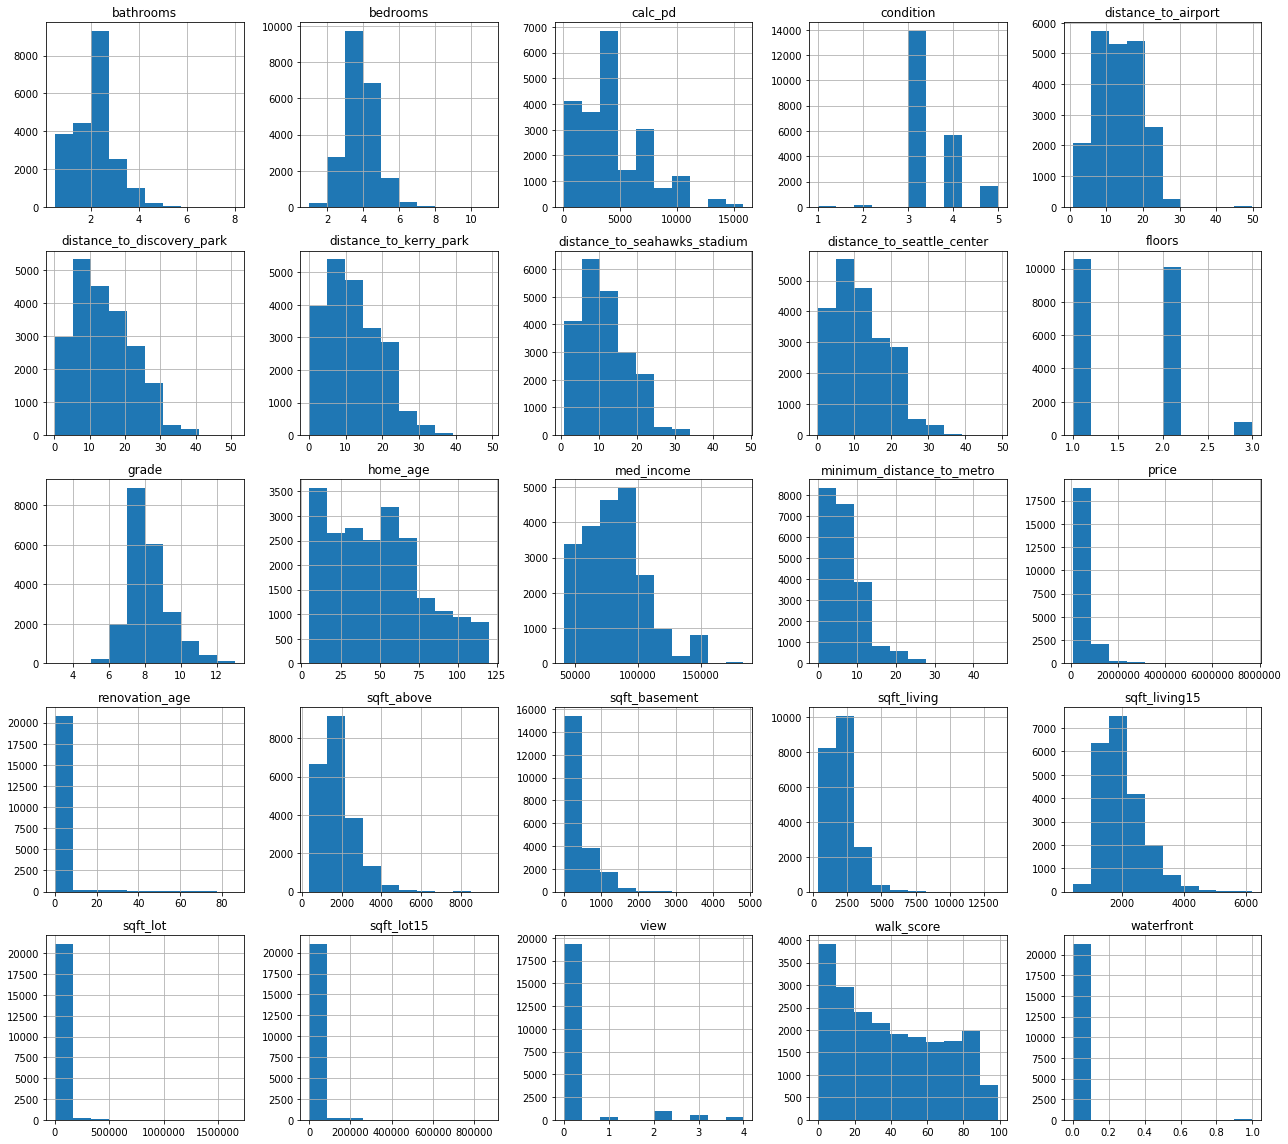

In [14]:
#check the distributions of each of the columns
df.drop(columns=['lat', 'long']).hist(figsize=(18,16));
plt.tight_layout()

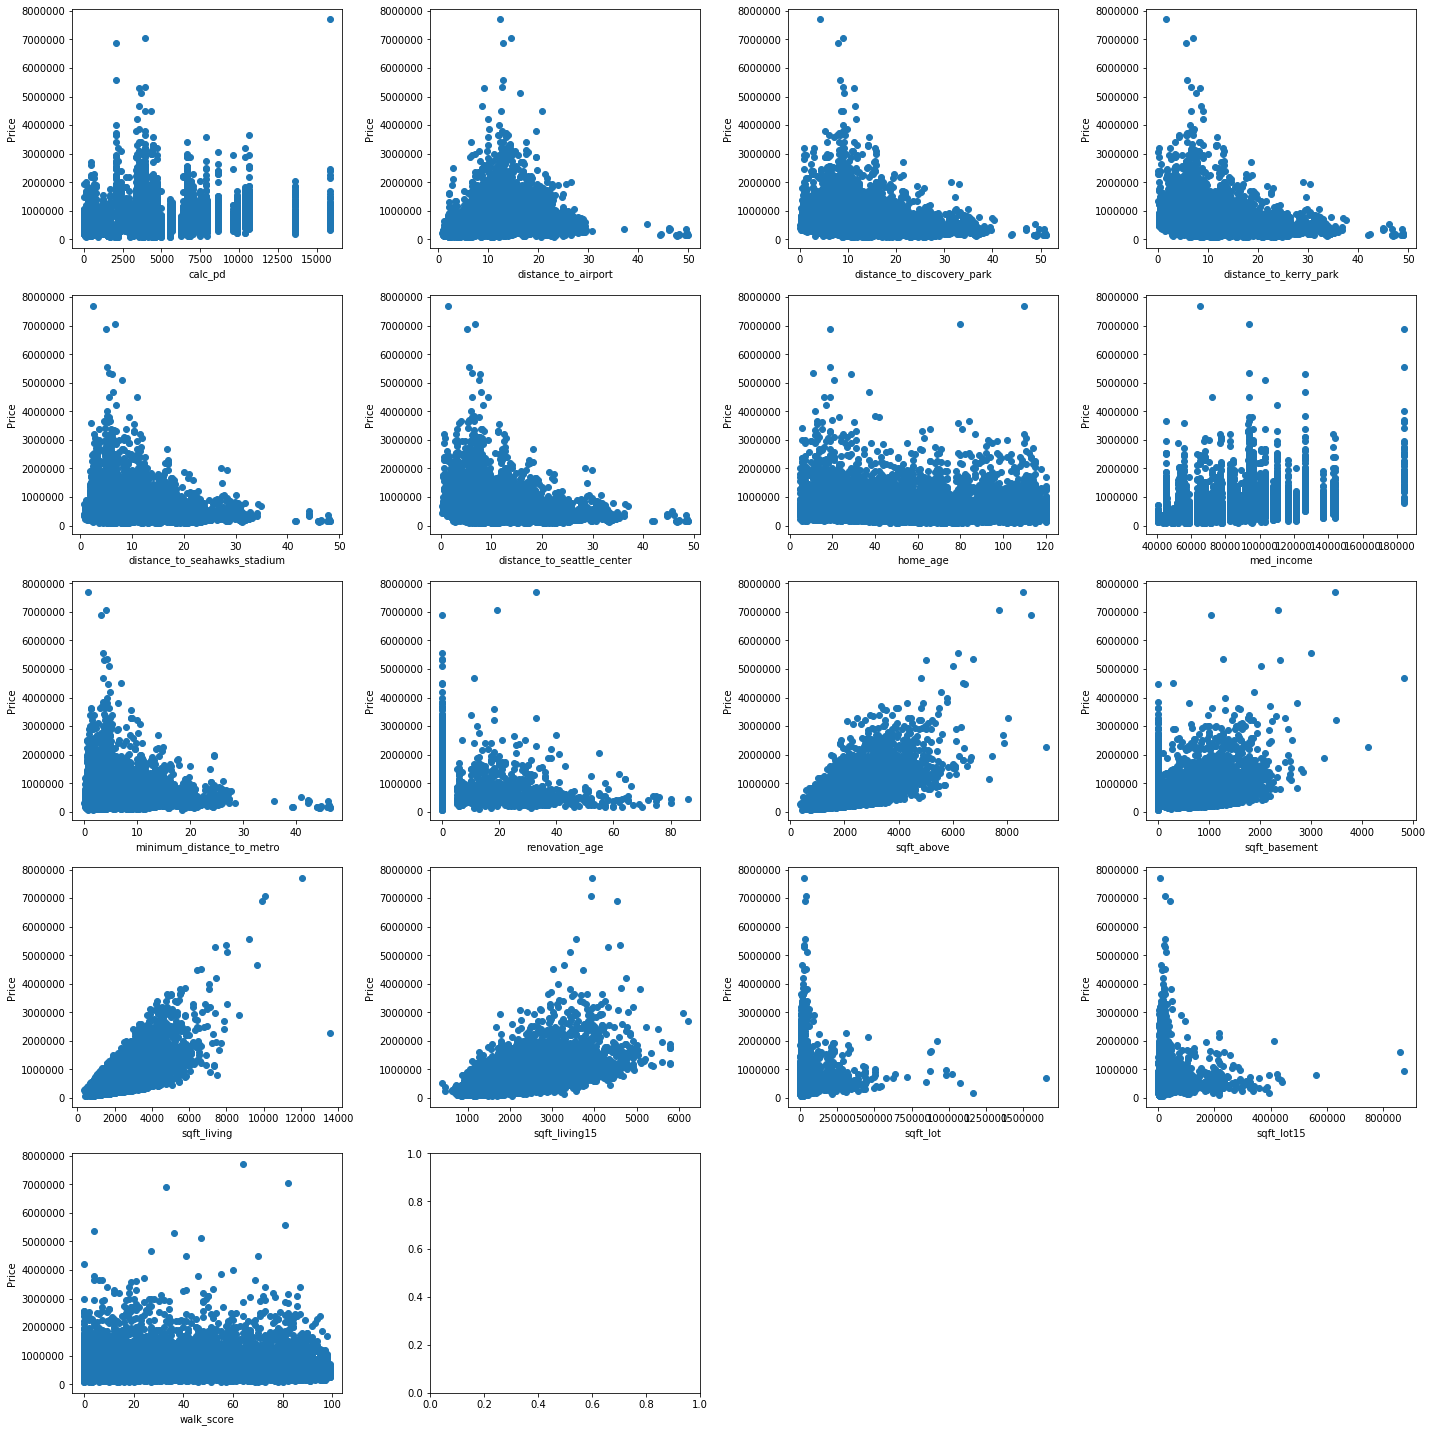

In [15]:
# Check scatter plot of each column with continuos data
cont_cols = ['calc_pd', 'distance_to_airport', 'distance_to_discovery_park', 'distance_to_kerry_park',
             'distance_to_seahawks_stadium', 'distance_to_seattle_center', 'home_age', 'med_income',
             'minimum_distance_to_metro', 'renovation_age', 'sqft_above', 'sqft_basement', 'sqft_living',
             'sqft_living15', 'sqft_lot', 'sqft_lot15', 'walk_score']
plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    if i > 16:
        break
    plt.scatter(df[cont_cols[i]], df['price'])
    plt.xlabel(cont_cols[i])
    plt.ylabel('Price')
plt.tight_layout()

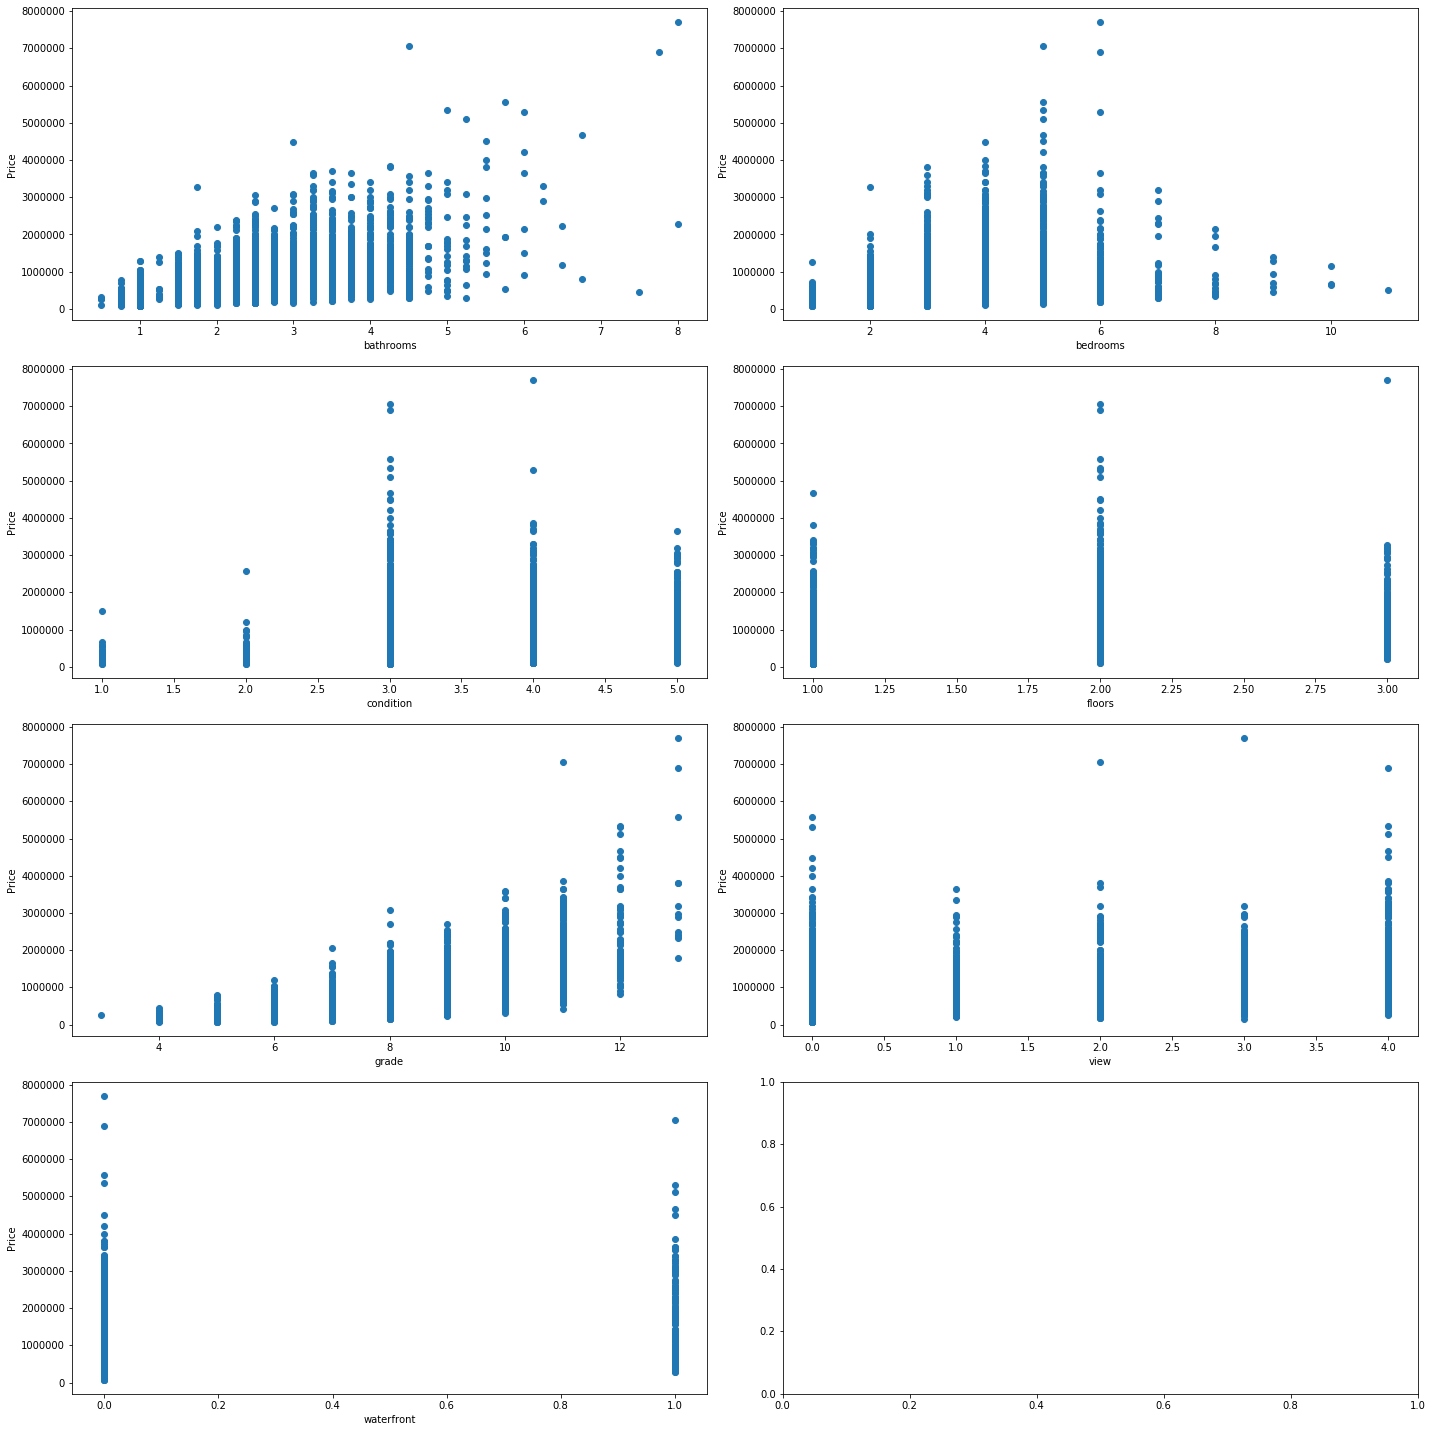

In [16]:
# Check scatter plot of each column with categorical data
cat_cols = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'view', 'waterfront']
plt.figure(figsize=(20,20))
for i in range(0, 8):
    plt.subplot(4, 2, i+1)
    if i > 6:
        break
    plt.scatter(df[cat_cols[i]], df['price'])
    plt.xlabel(cat_cols[i])
    plt.ylabel('Price')
plt.tight_layout()

In [17]:
df = df.loc[df.bedrooms <= 6]

In [18]:
df = df.loc[df.bathrooms <= 5]

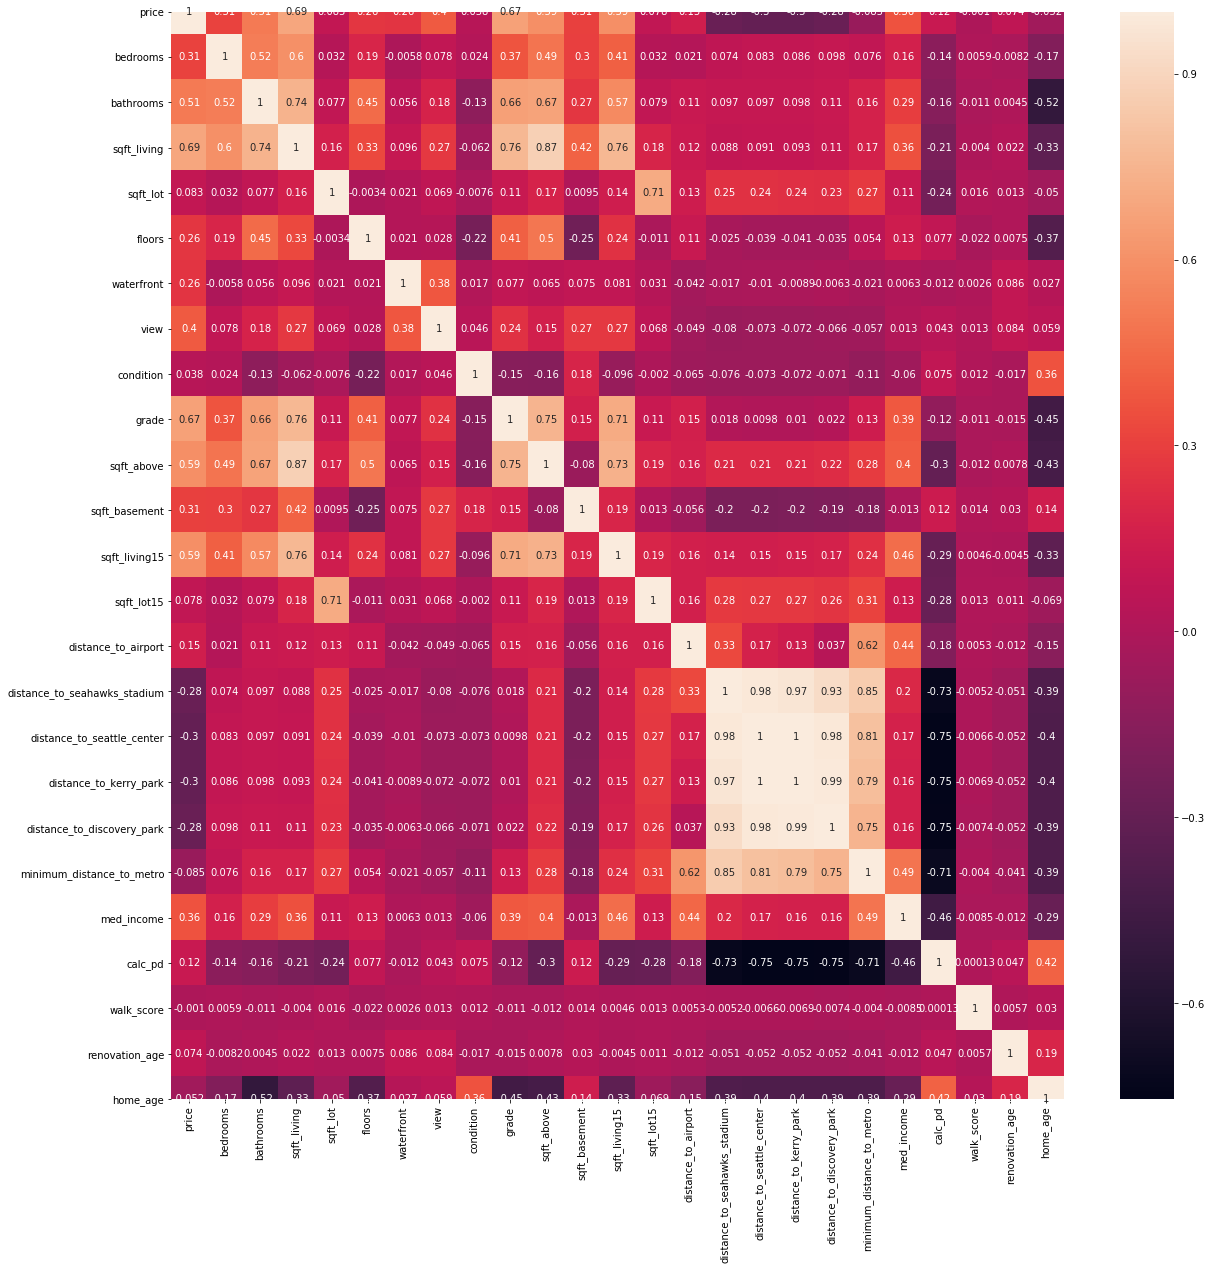

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=['lat', 'long']).corr(), annot=True);

In [20]:
# Remove columns we dont intend to use or have to high multicollinearity 
df.drop(columns=['condition', 'distance_to_discovery_park', 'distance_to_kerry_park', 
                'distance_to_seahawks_stadium', 'minimum_distance_to_metro', 'renovation_age',
                'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront',
                'grade', 'lat', 'long'], inplace=True)


In [21]:
X = df.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 23.711384503597372),
 ('bathrooms', 27.262074698800898),
 ('floors', 14.969792571390617),
 ('sqft_above', 15.426413585456947),
 ('sqft_basement', 2.4407243861607077),
 ('distance_to_airport', 7.918032764634993),
 ('distance_to_seattle_center', 6.202897516889382),
 ('med_income', 16.526477176172566),
 ('calc_pd', 7.157930467401469),
 ('walk_score', 2.8995612949919725),
 ('home_age', 5.909152781418517)]

In [22]:
#Calculate a new metric for Bathroom and Bedrooms
df['bed_bath'] = df['bedrooms'] / df['bathrooms']

In [23]:
#plt.figure(figsize=(20,20))
#sns.heatmap(df.corr(), annot=True);

In [24]:
df.drop(columns=['bedrooms', 'bathrooms'], inplace=True)

In [25]:
len(df)

21317

In [26]:
#plt.figure(figsize=(20,20))
#sns.heatmap(df.corr(), annot=True);


In [27]:
df.loc[df['sqft_basement']].describe()

,price,floors,sqft_above,sqft_basement,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath
count,2.131700e+04,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000
mean,3.352437e+05,1.197542,1358.538960,130.358399,9.254641,8.880349,65369.180185,5057.530480,38.526106,61.153868,2.564294
std,2.020469e+05,0.433900,444.605926,319.248924,6.608044,1.824470,18377.288116,1100.186231,17.436791,18.716452,0.720080
min,9.000000e+04,1.000000,530.000000,0.000000,2.090193,5.007783,45894.000000,468.807339,0.000000,6.000000,0.666667
25%,2.219000e+05,1.000000,1180.000000,0.000000,4.862539,8.837087,58707.000000,4967.422680,39.000000,65.000000,2.000000
50%,2.219000e+05,1.000000,1180.000000,0.000000,4.862539,8.837087,58707.000000,4967.422680,39.000000,65.000000,3.000000
75%,4.199500e+05,1.000000,1296.000000,0.000000,17.639210,8.837087,58707.000000,4967.422680,39.000000,65.000000,3.000000
max,2.400000e+06,3.000000,4240.000000,2090.000000,22.933728,25.087832,143686.000000,6879.591837,96.000000,106.000000,5.000000


In [28]:
df['sqft_basement'] = df['sqft_basement'].astype(dtype='int64')

In [29]:
#Categorize basement area into 4 categories 
df.loc[df['sqft_basement'] < 1, 'sqft_basement'] = 1
df.loc[((df['sqft_basement'] > 1) & (df['sqft_basement'] <=450)) , 'sqft_basement'] = 2
df.loc[((df['sqft_basement'] > 450) & (df['sqft_basement'] <= 970)), 'sqft_basement'] = 3
df.loc[df['sqft_basement'] > 970, 'sqft_basement'] = 4

In [30]:
bsmt_cat = df['sqft_basement'].astype('category')
bsmt_dum_df = pd.get_dummies(bsmt_cat, prefix='bsmt_val', drop_first=True)
df = pd.concat([df, bsmt_dum_df], axis=1)

In [31]:
#Categorize floors
floors_cat = df['floors'].astype('category')
floors_dum_df = pd.get_dummies(floors_cat, prefix='story', drop_first=True)
df = pd.concat([df, floors_dum_df], axis=1)

In [32]:
df.columns

Index(['price', 'floors', 'sqft_above', 'sqft_basement', 'distance_to_airport',
       'distance_to_seattle_center', 'med_income', 'calc_pd', 'walk_score',
       'home_age', 'bed_bath', 'bsmt_val_2', 'bsmt_val_3', 'bsmt_val_4',
       'story_2.0', 'story_3.0'],
      dtype='object')

In [33]:
df.rename(columns={'story_2.0': 'two_story', 'story_3.0': 'three_story'},inplace=True)
df.rename(columns={'bsmt_val_2': 'bsmt_med', 'bsmt_val_3':'bsmt_large', 'bsmt_val_4':'bsmt_xlarge'}, inplace=True)

In [34]:
df.drop(columns=['floors', 'sqft_basement'], inplace=True)


In [35]:
#plt.figure(figsize=(20,20))
#sns.heatmap(df.corr(), annot=True);

In [36]:
# Check for multicollinearity using VIF
X = df.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_above', 10.46678908060912),
 ('distance_to_airport', 7.932413285095404),
 ('distance_to_seattle_center', 5.84594802736805),
 ('med_income', 15.706646618363946),
 ('calc_pd', 6.049800850070601),
 ('walk_score', 2.894488641268013),
 ('home_age', 6.749626995013797),
 ('bed_bath', 9.774015975070467),
 ('bsmt_med', 1.257307801767132),
 ('bsmt_large', 1.4562170664452778),
 ('bsmt_xlarge', 1.2578279521142213),
 ('two_story', 3.285854171408646),
 ('three_story', 1.389009215493003)]

In [37]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [38]:
model_vanilla1 = ols(formula=formula, data=df).fit()
model_vanilla1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3096.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:45   Log-Likelihood:            -2.9087e+05
No. Observations:               21317   AIC:                         5.818e+05
Df Residuals:                   21303   BIC:                         5.819e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -2.08e+05   1.31e+04    -15.918      0.000   -2.34e+05   -1.82e+05
sqft_above                   294.4498      2.394    123.009      0.000     289.758     299.142
distance_to_airport         2731.4852    270.137     10.111      0.000    2201.996    3260.974
distance_to_seattle_center -1.419e+04    329.796    -43.024      0.000   -1.48e+04   -1.35e+04
med_income                     3.0865      0.080     38.396      0.000       2.929       3.244
calc_pd                       14.2747      0.884     16.150      0.000      12.542      16.007
walk_score                    13.4823     48.960      0.275      0.783     -82.483     109.447
home_age                    1448.4984     64.862     22.332      0.000    1321.363    1575.634
bed_bath                   -3.777e+04   2529.747    -14.931      0.000   -4.27e+04   -3.28e+04
bsmt_med                    8.377e+04   4984.054     16.807      0.000     7.4e+04    9.35e+04
bsmt_large                  1.237e+05   3914.289     31.614      0.000    1.16e+05    1.31e+05
bsmt_xlarge                 2.637e+05   5080.753     51.907      0.000    2.54e+05    2.74e+05
two_story                  -4.503e+04   3696.446    -12.181      0.000   -5.23e+04   -3.78e+04
three_story                -6909.8783   8730.313     -0.791      0.429    -2.4e+04    1.02e+04
==============================================================================
Omnibus:                    17588.301   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1055505.033
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      36.722   Cond. No.                     8.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

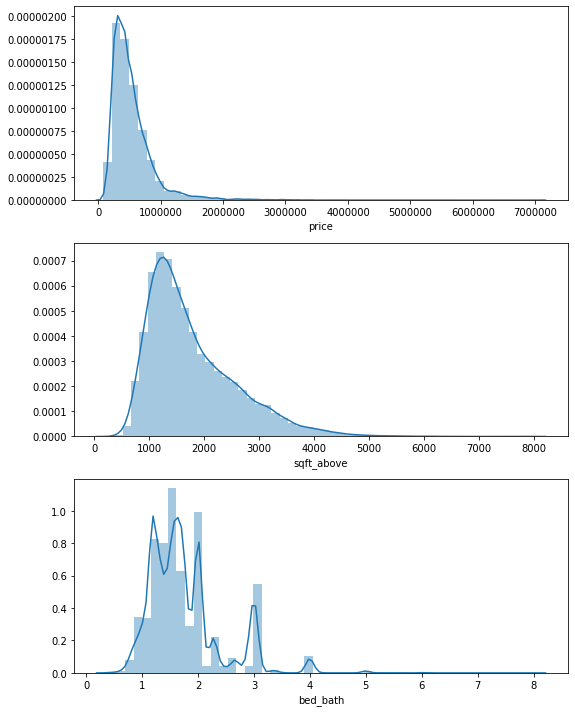

In [39]:
#look at distributions to check for outliers
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(df['sqft_above'], ax=axes[1])
sns.distplot(df['bed_bath'], ax=axes[2])

plt.tight_layout()

In [40]:
df['price'].describe()

count    2.131700e+04
mean     5.357410e+05
std      3.467812e+05
min      7.800000e+04
25%      3.210270e+05
50%      4.500000e+05
75%      6.410000e+05
max      7.060000e+06
Name: price, dtype: float64

In [41]:
# Outlier metric using quantiles for 2 St dev.
upper_price = df['price'].quantile([0.975])
lower_price = df['price'].quantile([0.025])
print(upper_price)
print(lower_price)

0.975    1450000.0
Name: price, dtype: float64
0.025    185000.0
Name: price, dtype: float64


In [42]:
#eliminate price outliers
df = df.loc[(df.price < 1490000) & (df.price > 185000)]

In [43]:
upper_price = df['price'].quantile([0.975])
lower_price = df['price'].quantile([0.025])
print(upper_price)
print(lower_price)

0.975    1170000.0
Name: price, dtype: float64
0.025    210000.0
Name: price, dtype: float64


In [44]:
df = df.loc[df.price < 1170000]

In [45]:
upper_sqft = df['sqft_above'].quantile([0.997])
lower_sqft = df['sqft_above'].quantile([0.003])
print(upper_sqft)
print(lower_sqft)

0.997    4297.68
Name: sqft_above, dtype: float64
0.003    610.0
Name: sqft_above, dtype: float64


In [46]:
upper_bed_bath = df['bed_bath'].quantile([0.997])
lower_bed_bath = df['bed_bath'].quantile([0.003])
print(upper_bed_bath)
print(lower_bed_bath)

0.997    4.0
Name: bed_bath, dtype: float64
0.003    0.727273
Name: bed_bath, dtype: float64


In [47]:
df.loc[(df['bed_bath'] < 1) & (df['bed_bath'] > 0.5)].describe()

,price,sqft_above,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath,bsmt_med,bsmt_large,bsmt_xlarge,two_story,three_story
count,6.840000e+02,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,5.719625e+05,1798.089181,13.719079,8.907485,80859.539474,5606.542149,38.812865,25.156433,0.846869,0.309942,0.178363,0.064327,0.698830,0.172515
std,2.179960e+05,838.044230,5.101780,6.543850,23134.579456,3864.297950,27.182051,23.054721,0.073071,0.462808,0.383098,0.245515,0.459102,0.378104
min,1.900000e+05,550.000000,1.406272,0.505394,40815.000000,41.211905,0.000000,5.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.950000e+05,1195.000000,9.835721,3.694143,65054.000000,2720.446927,15.000000,12.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.300000e+05,1540.000000,14.145653,5.909033,75763.000000,4810.151873,35.000000,15.000000,0.857143,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.246250e+05,2112.500000,17.123655,14.173443,96054.000000,7960.659898,59.000000,29.000000,0.923077,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.160000e+06,5710.000000,26.934585,31.551154,143686.000000,15844.274809,99.000000,120.000000,0.941176,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.loc[df.bed_bath == 4].describe()

,price,sqft_above,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath,bsmt_med,bsmt_large,bsmt_xlarge,two_story,three_story
count,3.170000e+02,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.00000,317.0,317.000000,317.000000,317.000000,317.000000,317.0
mean,4.051469e+05,1371.608833,11.653819,9.157682,69803.015773,5579.843881,39.858044,80.70347,4.0,0.129338,0.132492,0.028391,0.618297,0.0
std,1.684300e+05,327.475381,6.192196,5.967775,16922.281937,2924.530409,29.029045,20.16107,0.0,0.336104,0.339561,0.166350,0.486572,0.0
min,1.900000e+05,590.000000,1.401424,0.934635,40815.000000,41.211905,0.000000,37.00000,4.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.750000e+05,1150.000000,5.993313,4.838053,55950.000000,3794.600675,12.000000,65.00000,4.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.663500e+05,1350.000000,11.074295,7.768426,67566.000000,4967.422680,36.000000,76.00000,4.0,0.000000,0.000000,0.000000,1.000000,0.0
75%,5.000000e+05,1560.000000,16.537058,11.233080,77780.000000,7022.188450,66.000000,97.00000,4.0,0.000000,0.000000,0.000000,1.000000,0.0
max,1.050000e+06,2510.000000,27.119359,33.282169,137125.000000,15844.274809,94.000000,120.00000,4.0,1.000000,1.000000,1.000000,1.000000,0.0


In [49]:
df.loc[df.bed_bath > 4].describe()

,price,sqft_above,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath,bsmt_med,bsmt_large,bsmt_xlarge,two_story,three_story
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000
mean,507208.304348,1647.173913,11.128727,8.500786,69868.543478,6363.562920,45.608696,85.782609,5.159420,0.217391,0.195652,0.0,0.739130,0.021739
std,209294.574212,479.720581,5.920966,6.489918,18805.005845,3469.777629,31.105897,24.620599,0.515149,0.417029,0.401085,0.0,0.443961,0.147442
min,220000.000000,800.000000,1.714606,0.851924,40815.000000,171.399649,0.000000,13.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,325000.000000,1352.500000,6.762396,3.379361,53570.000000,4063.933397,16.500000,65.250000,5.000000,0.000000,0.000000,0.0,0.250000,0.000000
50%,522500.000000,1530.000000,10.578715,7.127013,68144.500000,6421.739130,38.500000,93.500000,5.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,623750.000000,1797.500000,15.277400,10.857492,82541.250000,7513.851351,77.500000,102.000000,5.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,1000000.000000,3240.000000,24.699515,26.097614,121415.000000,13616.450216,92.000000,120.000000,8.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [50]:
df = df.loc[(df.bed_bath < 4) & (df.bed_bath > 1)]

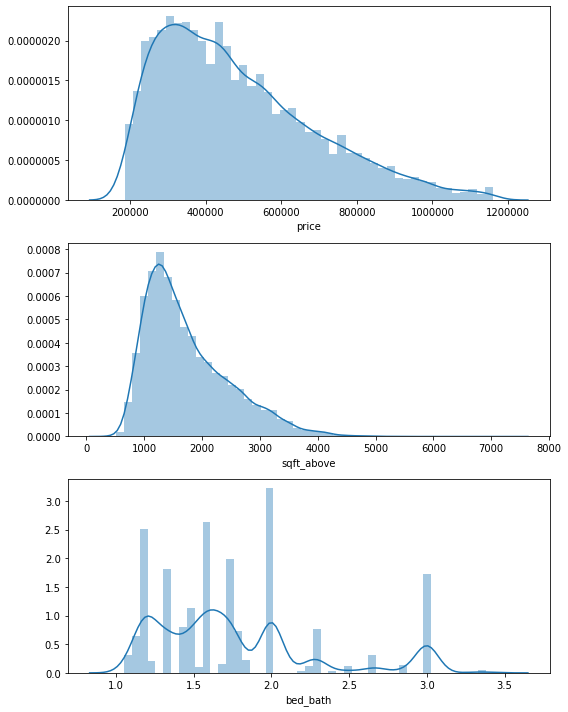

In [51]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(df['sqft_above'], ax=axes[1])
sns.distplot(df['bed_bath'], ax=axes[2])

plt.tight_layout()

In [52]:
df.loc[(df.sqft_above < 610) | (df.sqft_above > 4500)].describe()

,price,sqft_above,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath,bsmt_med,bsmt_large,bsmt_xlarge,two_story,three_story
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,6.058025e+05,2431.000000,13.880943,13.150191,88258.966667,3496.374948,38.000000,56.116667,1.581212,0.133333,0.166667,0.083333,0.450000,0.0
std,3.546310e+05,2207.925401,6.058762,7.769647,30274.995510,2915.425346,28.934174,31.427124,0.433240,0.342803,0.375823,0.278718,0.501692,0.0
min,2.020000e+05,370.000000,2.229350,0.328556,49233.000000,51.701032,0.000000,9.000000,1.066667,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.887500e+05,560.000000,8.626045,6.540871,66379.750000,662.107860,11.750000,29.000000,1.250000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4.350000e+05,595.000000,15.127265,12.942705,84159.000000,2410.861423,38.000000,57.000000,1.420168,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.007500e+06,4740.000000,18.514203,17.515808,104612.500000,6311.948867,63.000000,79.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,1.150000e+06,7320.000000,26.333666,34.848041,143686.000000,10357.500000,89.000000,115.000000,2.666667,1.000000,1.000000,1.000000,1.000000,0.0


In [53]:
df = df.loc[(df.sqft_above > 610) & (df.sqft_above < 4500)]

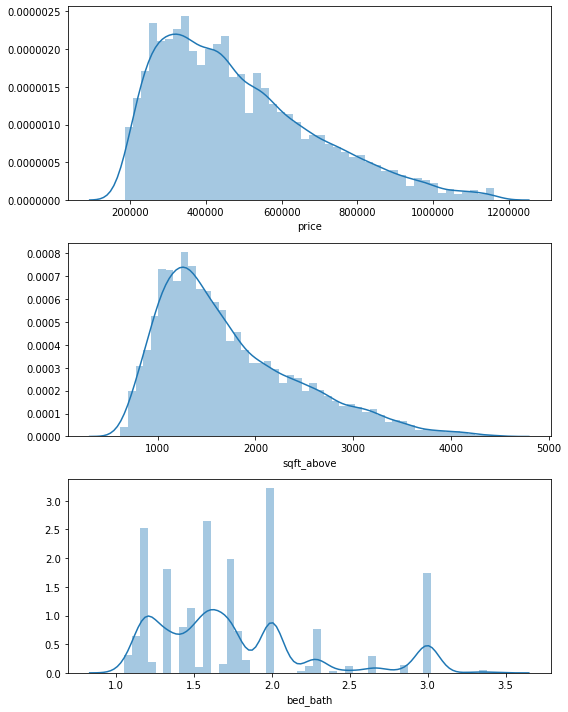

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(df['sqft_above'], ax=axes[1])
sns.distplot(df['bed_bath'], ax=axes[2])

plt.tight_layout()

In [55]:
len(df)

18095

In [56]:
df.describe()

,price,sqft_above,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath,bsmt_med,bsmt_large,bsmt_xlarge,two_story,three_story
count,1.809500e+04,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000,18095.000000
mean,4.864664e+05,1740.542415,13.494506,12.411501,81058.862282,4163.710514,40.082730,48.704172,1.762685,0.096214,0.199282,0.088201,0.455651,0.028074
std,2.062404e+05,717.679620,5.927250,7.059407,23654.971940,2878.798196,28.588545,28.589777,0.529461,0.294893,0.399471,0.283595,0.498043,0.165189
min,1.858500e+05,620.000000,0.794968,0.343923,40815.000000,41.211905,0.000000,5.000000,1.052632,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250000e+05,1200.000000,8.419683,6.673131,65674.500000,2185.126582,14.000000,25.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.430000e+05,1560.000000,13.795207,11.054585,77688.000000,3799.569707,36.000000,45.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.090000e+05,2150.000000,17.866406,17.120883,95043.000000,6275.352113,65.000000,67.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.160000e+06,4480.000000,49.703706,48.602983,183833.000000,15844.274809,99.000000,120.000000,3.428571,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
vanilla_model2 = ols(formula=formula, data=df).fit()
vanilla_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3231.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:52   Log-Likelihood:            -2.3624e+05
No. Observations:               18095   AIC:                         4.725e+05
Df Residuals:                   18081   BIC:                         4.726e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.021e+04   8446.009     -7.129      0.000   -7.68e+04   -4.37e+04
sqft_above                   184.5319      1.701    108.462      0.000     181.197     187.867
distance_to_airport         3747.1517    161.913     23.143      0.000    3429.787    4064.516
distance_to_seattle_center -1.095e+04    201.112    -54.462      0.000   -1.13e+04   -1.06e+04
med_income                     2.8873      0.049     59.068      0.000       2.792       2.983
calc_pd                       12.3002      0.553     22.261      0.000      11.217      13.383
walk_score                    34.6132     29.457      1.175      0.240     -23.125      92.351
home_age                     826.0929     41.564     19.875      0.000     744.624     907.561
bed_bath                   -2.713e+04   1894.207    -14.321      0.000   -3.08e+04   -2.34e+04
bsmt_med                    5.342e+04   3072.799     17.384      0.000    4.74e+04    5.94e+04
bsmt_large                  9.277e+04   2369.774     39.149      0.000    8.81e+04    9.74e+04
bsmt_xlarge                  1.49e+05   3177.967     46.889      0.000    1.43e+05    1.55e+05
two_story                  -9834.4929   2307.939     -4.261      0.000   -1.44e+04   -5310.713
three_story                -1.728e+04   5832.220     -2.963      0.003   -2.87e+04   -5846.710
==============================================================================
Omnibus:                     2499.793   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5622.293
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       5.183   Cond. No.                     8.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

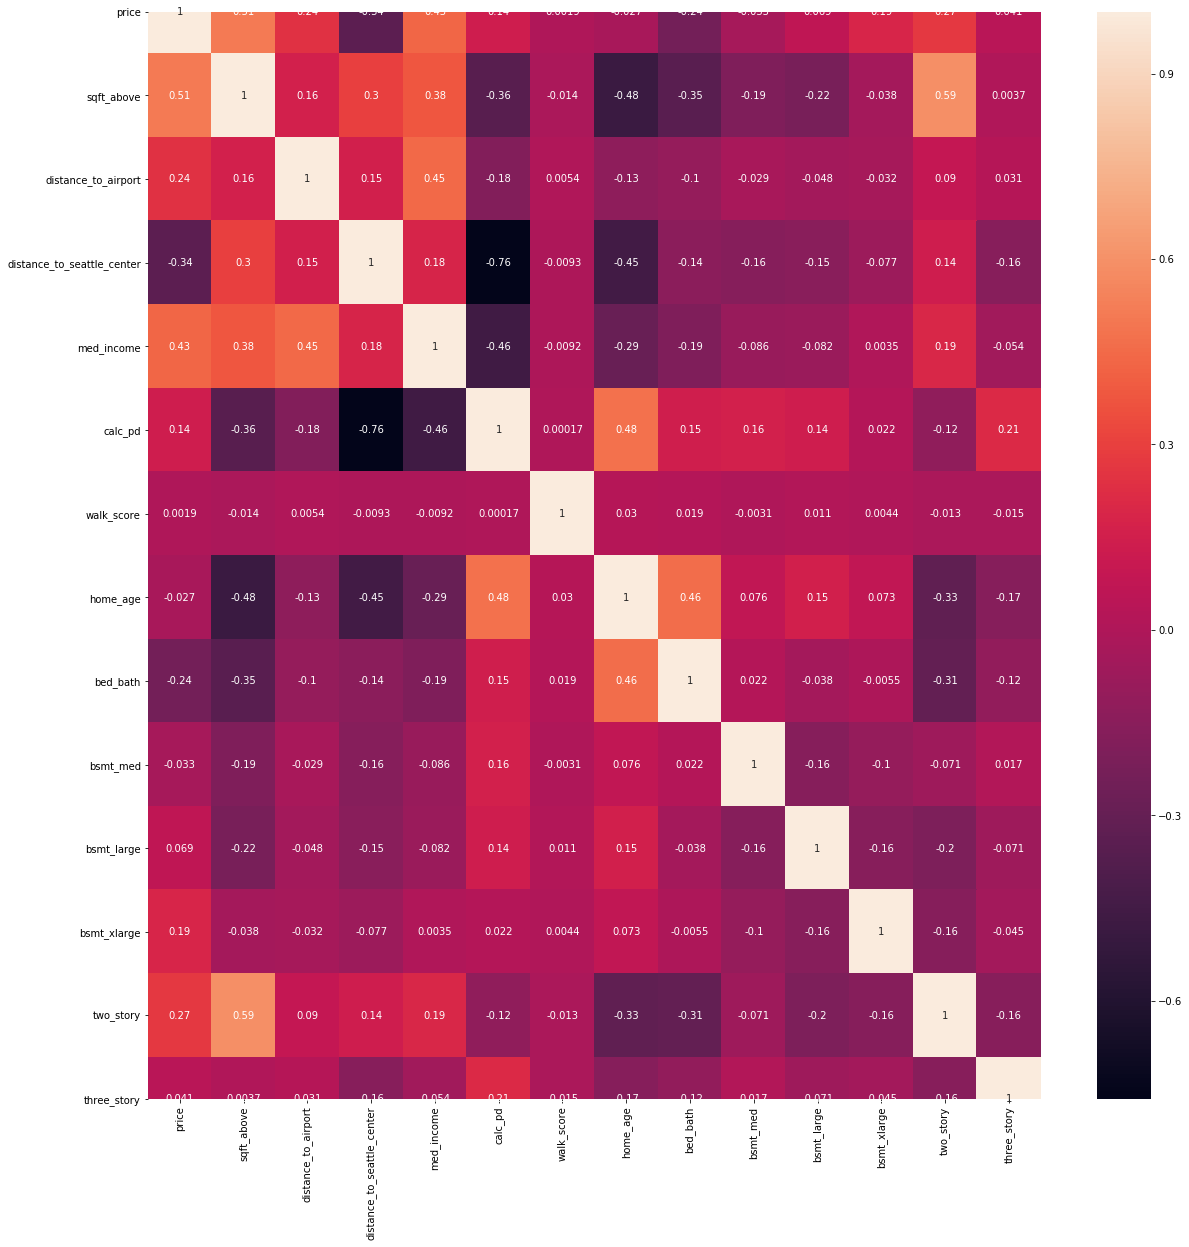

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [59]:
X = df.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_above', 13.109187075689892),
 ('distance_to_airport', 8.036416625454047),
 ('distance_to_seattle_center', 6.637539165930574),
 ('med_income', 16.868256868347835),
 ('calc_pd', 6.576257533283992),
 ('walk_score', 2.9085221351013133),
 ('home_age', 7.560141512072914),
 ('bed_bath', 13.755271469894577),
 ('bsmt_med', 1.2402756315962928),
 ('bsmt_large', 1.4966459365948963),
 ('bsmt_xlarge', 1.2307952385314636),
 ('two_story', 3.4263390520696864),
 ('three_story', 1.3362412174175995)]

In [60]:
df_drop1 = df.drop(columns=['distance_to_airport', 'calc_pd'])

In [61]:
X = df_drop1.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_above', 12.74377215038866),
 ('distance_to_seattle_center', 5.044264101295175),
 ('med_income', 12.404489517300496),
 ('walk_score', 2.8807962367064435),
 ('home_age', 6.176010683794999),
 ('bed_bath', 12.33114204790138),
 ('bsmt_med', 1.1873172042342819),
 ('bsmt_large', 1.4095606848387272),
 ('bsmt_xlarge', 1.2151981067118662),
 ('two_story', 3.233055734908892),
 ('three_story', 1.142599316354217)]

In [62]:
df_drop2 = df_drop1.drop(columns=['walk_score'])

In [63]:
X = df_drop2.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_above', 12.687344528367943),
 ('distance_to_seattle_center', 5.0133712983879715),
 ('med_income', 12.317780505577375),
 ('home_age', 6.115343544932867),
 ('bed_bath', 12.167054741064465),
 ('bsmt_med', 1.1847757672459638),
 ('bsmt_large', 1.4032171812730037),
 ('bsmt_xlarge', 1.2137079174730723),
 ('two_story', 3.230790153892184),
 ('three_story', 1.1397602132026066)]

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_drop2.corr(), annot=True);

In [ ]:
outcome = 'price'
predictors = df_drop2.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

vanilla_model3 = ols(formula=formula, data=df_drop1).fit()
vanilla_model3.summary()

In [ ]:
df_high_pval = df_drop2.drop(columns=['two_story'])
df_high_pval.head()

In [ ]:
#Log transform 
df_log = pd.DataFrame()
df_log['price'] = df_high_pval['price'].map(lambda x: np.log(x))
df_log['sqft_above'] = df_high_pval['sqft_above'].map(lambda x: np.log(x))
#df_log['sqft_basement'] = df_high_pval['sqft_basement'].map(lambda x: np.log(x+1))
df_log['dist_to_seattle_center'] = df_high_pval['distance_to_seattle_center'].map(lambda x: np.log(x))
df_log['med_income'] = df_high_pval['med_income'].map(lambda x: np.log(x))
df_log['home_age'] = df_high_pval['home_age'].map(lambda x: np.log(x))
df_log['bed_bath'] = df_high_pval['bed_bath'].map(lambda x: np.log(x))
#df_log['two_story'] = df_high_pval['two_story']
df_log['bsmt_med'] = df_high_pval['bsmt_med']
df_log['bsmt_large'] = df_high_pval['bsmt_large']
df_log['bsmt_xlarge'] = df_high_pval['bsmt_xlarge']
df_log['three_story'] = df_high_pval['three_story']

df_log.head()

In [ ]:
# Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_log)
scaled_df = pd.DataFrame(scaled)
column_dict = dict(zip(scaled_df.columns, df_log.columns))

scaled_df.rename(columns=column_dict, inplace=True)
scaled_df.head()

In [ ]:
outcome = 'price'
predictors_scaled = scaled_df.drop(['price'], axis=1)
pred_scaled_sum = '+'.join(predictors_scaled.columns)
formula_scaled = outcome + '~' + pred_scaled_sum

model4 = ols(formula = formula_scaled, data=scaled_df).fit()
model4.summary()

In [ ]:
import scipy.stats as stats
resid = model4.resid
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [ ]:
X = scaled_df.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(scaled_df.corr(), annot=True);

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(resid, model4.model.exog)
bp_test = het_breuschpagan(resid, model4.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

In [ ]:
for x in predictors_scaled.columns:
    fig = plt.figure(figsize=(10,8))
    fig = sm.graphics.plot_regress_exog(model4, x, fig=fig)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
X = scaled_df.drop(columns=['price'])
y  = scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

print(mean_squared_error(y_train, y_hat_train))
print(mean_squared_error(y_test, y_hat_test))


In [ ]:
from sklearn.model_selection import cross_val_score
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [ ]:
print(cv_10_results)
print(cv_20_results)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(mean_squared_error(y, linreg.predict(X)))
print(r2_score(y, linreg.predict(X)))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4, 5]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    print("degree %d" % degree, mean_squared_error(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.transform(X)
    
    # Now, we want to see what the model predicts for the entire data  
    y_poly = reg_poly.predict(X_poly)
    
    # Create plot of predicted values
    #plt.plot(X, y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    #plt.legend(loc='lower left')


In [ ]:
poly2 = PolynomialFeatures(2)
X_degree2 = poly2.fit_transform(X)
reg_poly2 = LinearRegression().fit(X_degree2, y)

from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(reg_poly2, X_degree2, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results.mean()

In [ ]:
poly4 = PolynomialFeatures(4)
X_degree4 = poly4.fit_transform(X)
reg_poly4 = LinearRegression().fit(X_degree4, y)

from sklearn.model_selection import cross_val_score

cv_5_results2  = np.mean(cross_val_score(reg_poly4, X_degree4, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results2.mean()

#### Are certain areas more expensive ?

In [ ]:
df_question1['price_per_sqft'] =df_question1["price"]/df_question1["sqft_above"]
 # arrange price/sqft, remove outliers and form bins of size 100
bins= np.arange(np.quantile(df_question1.price_per_sqft, .015) , np.quantile(df_question1.price_per_sqft, 0.9985), step=100)
df_question1['price_per_sqft_range'] = pd.cut(df_question1['price_per_sqft'],bins) #Segment and sort price/sqft into bins 
df_out = df_question1.loc[(df_question1['price_per_sqft'] > 119) & (df_question1['price_per_sqft'] < 500)]
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_question1,x="long", y="lat", hue= 'price_per_sqft_range')
plt.title('Price per Sqft')
plt.show()


#### Looking at price per sqft we can see The central regios is the most expensive , followed by the north and north west .South is the Cheapest

#### Q1:Do houses tend to have more sqft of living in certain parts ?

In [ ]:
df_out2 = df_question1.loc[(df_question1['sqft_above'] > 180) & (df_question1['sqft_above'] < 3240)]
# sns.scatterplot(data=df_question1,x="long", y="lat", hue= 'sqft_living_range')
plt.figure(figsize=(20,10))
plt.scatter(df_out2['long'], df_out2['lat'], c=df_out2['sqft_above'],s=1)
plt.colorbar().set_label('Sqft', fontsize=14)
plt.title('Sqft')
plt.show()


#### We can see houses tend to be bigger in the northwest and smaller in the east .  